In [1]:
%matplotlib inline
import numpy as np
#%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
from decimal import Decimal
import scipy
from scipy import special
from scipy.integrate import trapz, simps
import I_n_P as P
from importlib import reload
plt.style.use('ggplot')
path = 'C:\\WINDOWS\\Fonts\\BOOKOS.TTF'
prop = fm.FontProperties(fname=path)
plt.rcParams['font.family'] = prop.get_name()
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=[r'\usepackage{amsmath}',
          r'\usepackage{xfrac}']

In [2]:
reload(P)

<module 'I_n_P' from 'C:\\Users\\giannis\\Desktop\\Python_scrpts\\I_n_P.py'>

Start by reading magnetic field components and data.

In [3]:
angle_s,Bp,B = P.magnetic_read()

In [4]:
angle,Eq,Tur,ring,R_s,Z_s = P.exb_read()

In [5]:
angle_m,Mag,R_m,Z_m = P.mag_read()

In [6]:
angle_g,Geom,R_g,Z_g = P.geom_read()

In [7]:
angle_o,Eqo,Turo,R_o,Z_o = P.old_read()

In [8]:
angle_d,DMag,R_d,Z_d = P.diamag_read()

In [9]:
'''Smoothing all fluxes.'''
SEq = P.smooth(np.asarray(Eq),30)
STur = P.smooth(np.asarray(Tur),30)
SRing = P.smooth(np.asarray(ring),30)
SEqo = P.smooth(np.asarray(Eqo),30)
STuro = P.smooth(np.asarray(Turo),30) 
SMag = P.smooth(np.asarray(Mag),30)
SDMag = P.smooth(np.asarray(DMag),30)
SGeom = P.smooth(np.asarray(Geom),30)

Plotting the arrow plots of the fluxes.

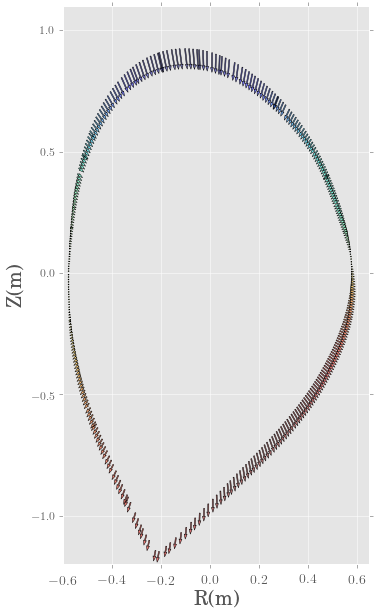

In [10]:
'''Magnetic Flux.'''
new_an = np.arctan2(Z_m,R_m)
Magx,Magy = SMag*np.cos(new_an), SMag*np.sin(new_an)
plt.figure(figsize=(10,10))
plt.quiver(R_m, Z_m, Magx, Magy, SMag, alpha=.5)
plt.quiver(R_m, Z_m, Magx, Magy, edgecolor='k', facecolor='None', linewidth=.5)
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.xlim(-0.6,0.65)
plt.ylim(-1.2,1.1)
plt.axes().set_aspect(0.99)
plt.show()

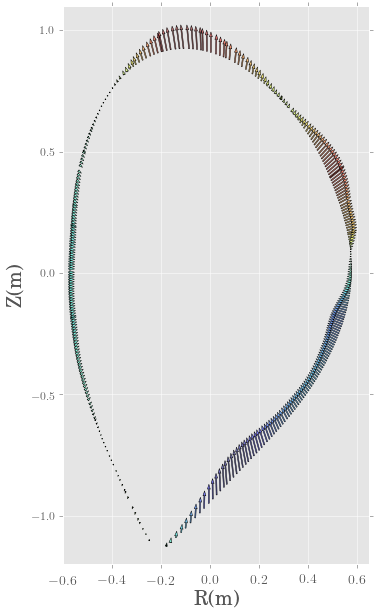

In [11]:
'''DiaMagnetic Flux.'''
new_an = np.arctan2(Z_d,R_d)
Magx,Magy = SDMag*np.cos(new_an), SDMag*np.sin(new_an)
plt.figure(figsize=(10,10))
plt.quiver(R_d, Z_d, Magx, Magy, SDMag, alpha=.5)
plt.quiver(R_d, Z_d, Magx, Magy, edgecolor='k', facecolor='None', linewidth=.5)
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.xlim(-0.6,0.65)
plt.ylim(-1.2,1.1)
plt.axes().set_aspect(0.99)
plt.show()

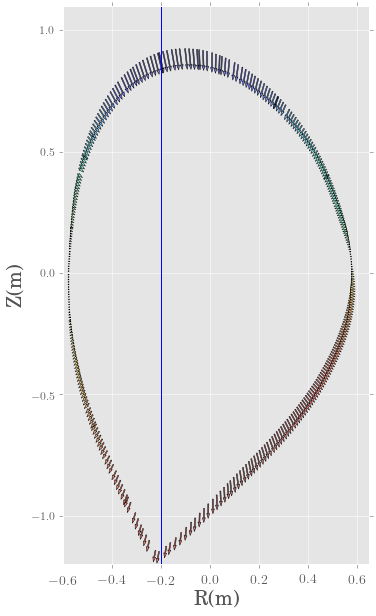

In [15]:
'''Geometric Magnetic Flux.'''
new_an = np.arctan2(Z_g,R_g)
gMagx,gMagy = SGeom*np.cos(new_an), SGeom*np.sin(new_an)
plt.figure(figsize=(10,10))
plt.quiver(R_g, Z_g, gMagx, gMagy, SGeom, alpha=.5)
plt.quiver(R_g, Z_g, gMagx, gMagy, edgecolor='k', facecolor='None', linewidth=.5)
#plt.axhline(y=-1.1)
#plt.axhline(y=-1.15)
#plt.axhline(y=-0.83)
#plt.axhline(y=-0.99)
plt.axvline(x=-0.2)
#plt.axvline(x=+0.2)
#plt.axhline(y=-1.25)
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.xlim(-0.6,0.65)
plt.ylim(-1.2,1.1)
plt.axes().set_aspect(0.99)
plt.show()

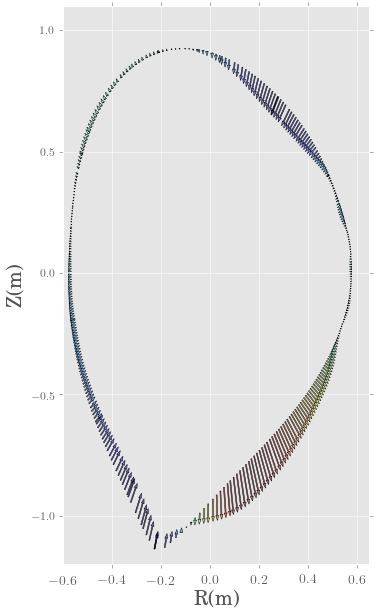

In [15]:
'''Equilibrium ExB Flux.'''
new_an = np.arctan2(Z_s,R_s)
Eqx,Eqy = SEq*np.cos(new_an), SEq*np.sin(new_an)
plt.figure(figsize=(10,10))
plt.quiver(R_s, Z_s, Eqx, Eqy, SEq, alpha=.5)
plt.quiver(R_s, Z_s, Eqx, Eqy, edgecolor='k', facecolor='None', linewidth=.5)
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.xlim(-0.6,0.65)
plt.ylim(-1.2,1.1)
plt.axes().set_aspect(0.99)
plt.show()

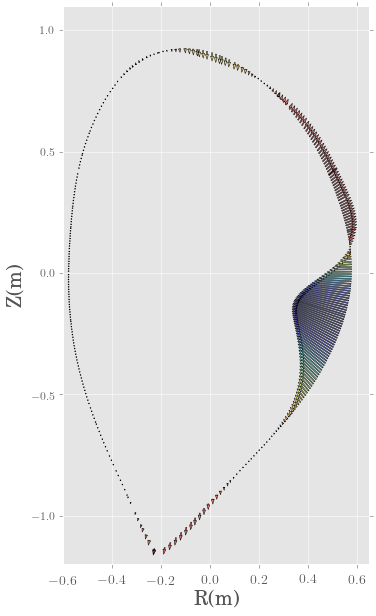

In [16]:
'''Ringing ExB Flux.'''
new_an = np.arctan2(Z_s,R_s)
Rx,Ry = SRing*np.cos(new_an), SRing*np.sin(new_an)
plt.figure(figsize=(10,10))
plt.quiver(R_s, Z_s, Rx, Ry, SRing, alpha=.5)
plt.quiver(R_s, Z_s, Rx, Ry, edgecolor='k', facecolor='None', linewidth=.5)
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.xlim(-0.6,0.65)
plt.ylim(-1.2,1.1)
plt.axes().set_aspect(0.99)
plt.show()

In [17]:
'''Turbulent ExB Flux.'''
new_an = np.arctan2(Z_s,R_s)
Turx,Tury = STur*np.cos(new_an), STur*np.sin(new_an)
plt.figure(figsize=(10,10))
plt.quiver(R2_s, Z2_s, Turx, Tury, STur2, alpha=.5)
plt.quiver(R2_s, Z2_s, Turx, Tury, edgecolor='k', facecolor='None', linewidth=.5)
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.xlim(-0.6,0.8)
plt.ylim(-1.2,1.1)
plt.axes().set_aspect(0.99)
plt.show()

NameError: name 'R2_s' is not defined

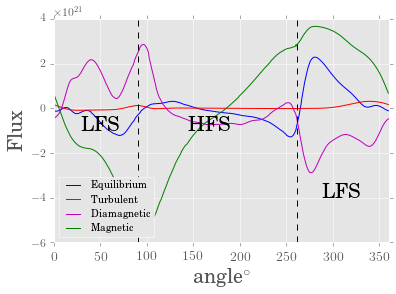

In [18]:
'''Plotting all fluxes vs. angle.'''
plt.figure()
plt.plot(angle_s,SEq,'b',label='Equilibrium')
plt.plot(angle_s,STur,'r',label='Turbulent')
plt.plot(angle_d,SDMag,'m',label='Diamagnetic')
#plt.plot(angle_s,SRing,'m',label='Ringing')
#plt.plot(angle2_s,SEq2,'b',label='Equilibrium2')
#plt.plot(angle_s,STur,'r',label='Turbulent')
plt.plot(angle_m,SMag,'g',label='Magnetic')
plt.axvline(x=261,color='k',linestyle='--')
plt.axvline(x=90,color='k',linestyle='--')
plt.annotate('HFS', xy=(0.3,0.5),xytext=(0.4, 0.5),textcoords='axes fraction')
plt.annotate('LFS', xy=(0.3,0.5),xytext=(0.8, 0.2),textcoords='axes fraction')
plt.annotate('LFS', xy=(0.3,0.5),xytext=(0.08, 0.5),textcoords='axes fraction')
plt.xlabel(r'angle$^{\circ}$')
plt.xlim(0.0,360.0)
plt.ylabel('Flux')
plt.legend(loc=3)
plt.show()

Performing the Integrals

In [19]:
'''Radii.'''
r_s,R_maj_s = P.major_R(R_s,Z_s)
r_m,R_maj_m = P.major_R(R_m,Z_m)
r_g,R_maj_g = P.major_R(R_g,Z_g)
r_o,R_maj_o = P.major_R(R_o,Z_o)
r_d,R_maj_d = P.major_R(R_d,Z_d)

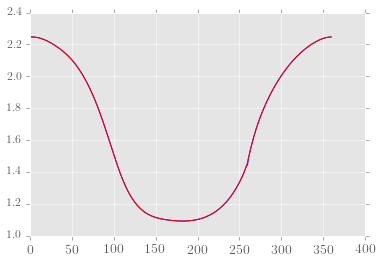

In [20]:
plt.plot(angle,R_maj_s,'b')
plt.plot(angle_o,R_maj_o,'r')
plt.show()

In [21]:
'''Particle current accross the separatrix.'''
Equilibrium_Particle_Curr = P.Tokamak_Integral(R_maj_s[0:360],r_s[0:360],angle[0:360],SEq[0:360])
Turbulent_Particle_Curr = P.Tokamak_Integral(R_maj_s[0:360],r_s[0:360],angle[0:360],STur[0:360])
old_Equilibrium_Particle_Curr = P.Tokamak_Integral(R_maj_o[0:360],r_o[0:360],angle_o[0:360],SEqo[0:360])
old_Turbulent_Particle_Curr = P.Tokamak_Integral(R_maj_o[0:360],r_o[0:360],angle_o[0:360],STuro[0:360])
Magnetic_Particle_Curr = P.Tokamak_Integral(R_maj_m[0:360],r_m[0:360],angle_m[0:360],SMag[0:360])
DiaMagnetic_Particle_Curr = P.Tokamak_Integral(R_maj_d[0:360],r_d[0:360],angle_d[0:360],SDMag[0:360])
Geometric_Magnetic_Particle_Curr = P.Tokamak_Integral(R_g[0:360],r_g[0:360],angle_g[0:360],SGeom[0:360])
print("Equilibrium Particle current = ",Equilibrium_Particle_Curr)
print("Turbulent Particle current = ",Turbulent_Particle_Curr)
print("Old Equilibrium Particle current = ",old_Equilibrium_Particle_Curr)
print("Old Turbulent Particle current = ",old_Turbulent_Particle_Curr)
print("Magnetic Particle current = ",Magnetic_Particle_Curr)
print("DiaMagnetic Particle current = ",DiaMagnetic_Particle_Curr)
print("Geometric Magnetic Particle current = ",Geometric_Magnetic_Particle_Curr)

Equilibrium Particle current =  1.53194124891e+21
Turbulent Particle current =  1.58272265317e+21
Old Equilibrium Particle current =  3.25776588418e+21
Old Turbulent Particle current =  1.63247684183e+21
Magnetic Particle current =  1.04605247105e+21
DiaMagnetic Particle current =  -7.00135266825e+21
Geometric Magnetic Particle current =  127519133661.0


In [22]:
'''FSA <Q grad\psi>'''
normalization = P.Normalization(Bp[0:360],r_s[0:360],angle[0:360])
Equilibrium_grad_FSA = P.Tokamak_Integral(R_maj_s[0:360],r_s[0:360],angle[0:360],SEq[0:360])/normalization
Turbulent_grad_FSA = P.Tokamak_Integral(R_maj_s[0:360],r_s[0:360],angle[0:360],STur[0:360])/normalization
old_Equilibrium_grad_FSA = P.Tokamak_Integral(R_maj_o[0:360],r_o[0:360],angle_o[0:360],SEqo[0:360])/normalization
old_Turbulent_grad_FSA = P.Tokamak_Integral(R_maj_o[0:360],r_o[0:360],angle_o[0:360],STuro[0:360])/normalization
Magnetic_grad_FSA = P.Tokamak_Integral(R_maj_m[0:360],r_m[0:360],angle_m[0:360],SMag[0:360])/normalization
DiaMagnetic_grad_FSA = P.Tokamak_Integral(R_maj_d[0:360],r_d[0:360],angle_d[0:360],SDMag[0:360])/normalization
Geometric_Magnetic_grad_FSA = P.Tokamak_Integral(R_maj_g[0:360],r_g[0:360],angle_g[0:360],SGeom[0:360])/normalization
print("Equilibrium grad FSA = ",Equilibrium_grad_FSA)
print("Turbulent grad FSA = ",Turbulent_grad_FSA)
print("Old Equilibrium grad FSA = ",old_Equilibrium_grad_FSA)
print("Old Turbulent grad FSA = ",old_Turbulent_grad_FSA)
print("Magnetic grad FSA = ",Magnetic_grad_FSA)
print("DiaMagnetic grad FSA = ",DiaMagnetic_grad_FSA)
print("Geometric Magnetic grad FSA = ",Geometric_Magnetic_grad_FSA)
print("cancellation Equilibrium = ",Equilibrium_grad_FSA/max(SEq))
print("cancellation Turbulent = ",Turbulent_grad_FSA/max(STur))
print("cancellation old Equilibrium = ",old_Equilibrium_grad_FSA/max(SEqo))
print("cancellation old Turbulent = ",old_Turbulent_grad_FSA/max(STuro))
print("cancellation Magnetic = ",Magnetic_grad_FSA/max(SMag))
print("cancellation DiaMagnetic = ",DiaMagnetic_grad_FSA/max(SDMag))
print("cancellation Geometric Magnetic = ",Geometric_Magnetic_grad_FSA/max(SGeom))

Equilibrium grad FSA =  1.19006067816e+19
Turbulent grad FSA =  1.22950928785e+19
Old Equilibrium grad FSA =  2.53073613637e+19
Old Turbulent grad FSA =  1.26815992379e+19
Magnetic grad FSA =  8.12606824167e+18
DiaMagnetic grad FSA =  -5.43887339697e+19
Geometric Magnetic grad FSA =  1289981538.77
cancellation Equilibrium =  0.00519017993877
cancellation Turbulent =  0.0391462618796
cancellation old Equilibrium =  0.0109898638451
cancellation old Turbulent =  0.0386914065294
cancellation Magnetic =  0.00221271117068
cancellation DiaMagnetic =  -0.0190310391141
cancellation Geometric Magnetic =  0.00637555195893


In [23]:
'''FSA'''
Equilibrium_FSA = P.FSA_Integral(Bp[0:360],r_s[0:360],angle[0:360],SEq[0:360])/normalization
Turbulent_FSA = P.FSA_Integral(Bp[0:360],r_s[0:360],angle[0:360],STur[0:360])/normalization
old_Equilibrium_FSA = P.FSA_Integral(Bp[0:360],r_o[0:360],angle_o[0:360],SEqo[0:360])/normalization
old_Turbulent_FSA = P.FSA_Integral(Bp[0:360],r_o[0:360],angle_o[0:360],STuro[0:360])/normalization
Magnetic_FSA = P.FSA_Integral(Bp[0:360],r_m[0:360],angle_m[0:360],SMag[0:360])/normalization
DiaMagnetic_FSA = P.FSA_Integral(Bp[0:360],r_d[0:360],angle_d[0:360],SDMag[0:360])/normalization
Geometric_Magnetic_FSA = P.FSA_Integral(Bp[0:360],r_g[0:360],angle_g[0:360], SGeom[0:360])/normalization
print("Equilibrium FSA = ",Equilibrium_FSA)
print("Turbulent FSA = ",Turbulent_FSA)
print("Old Equilibrium FSA = ",old_Equilibrium_FSA)
print("Old Turbulent FSA = ",old_Turbulent_FSA)
print("Magnetic FSA = ",Magnetic_FSA)
print("DiaMagnetic FSA = ",DiaMagnetic_FSA)
print("Geometric Magnetic FSA = ",Geometric_Magnetic_FSA)
print("cancellation Equilibrium = ",Equilibrium_FSA/max(SEq))
print("cancellation Turbulent = ",Turbulent_FSA/max(STur))
print("cancellation Old Equilibrium = ",old_Equilibrium_FSA/max(SEqo))
print("cancellation Old Turbulent = ",old_Turbulent_FSA/max(STuro))
print("cancellation Magnetic = ",Magnetic_FSA/max(SMag))
print("cancellation DiaMagnetic = ",DiaMagnetic_FSA/max(SDMag))
print("cancellation Geometric Magnetic = ",Geometric_Magnetic_FSA/max(SGeom))

Equilibrium FSA =  -3.05389201178e+20
Turbulent FSA =  1.34968006933e+19
Old Equilibrium FSA =  -1.86841140164e+20
Old Turbulent FSA =  1.40454833332e+19
Magnetic FSA =  7.33422562363e+20
DiaMagnetic FSA =  -1.26657813853e+20
Geometric Magnetic FSA =  43114887029.3
cancellation Equilibrium =  -0.133188578916
cancellation Turbulent =  0.0429723711484
cancellation Old Equilibrium =  -0.0811368147614
cancellation Old Turbulent =  0.0428526004769
cancellation Magnetic =  0.199709410296
cancellation DiaMagnetic =  -0.0443185496998
cancellation Geometric Magnetic =  0.213089252984
